In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import seaborn as sns
import warnings
sns.set()
warnings.filterwarnings("ignore")

# 1. Dataset information
The Mobile Price Classification dataset contains 2000 samples and 21 features. In this dataset we can find features like :
<ul>
    <li>fc: front camera pixels</li>
    <li>four_g: has 4G or not</li>
    <li>int_memory: internal memory in gigabytes</li>
    <li>ram: random acces memory in megabytes</li>
    <li>n_cores: number of cores of processor</li>
    <li>etc.</li>
</ul>

### The aim of this project is to predict, based on this features, the price range of a mobile phone (0 – low price, 1 – medium price, 2 – high price, 3 – very high price). The dataset can be downloaded from:
https://www.kaggle.com/iabhishekofficial/mobile-price-classification

## 1.1 Dataset cleaning

Before we proceed to data cleaning (imputing missing values, converting columns stored as text into numbers, removing duplicate entries or entries that contain missing values) we must first check if our dataset contains any missing values, duplicate entries or columns stored as text. The dataset doesn’t contain duplicate entries, missing values and all of its features are numeric.

In [4]:
df = pd.read_csv('your-path/train.csv')
print('Dataset shape:' , df.shape)

Dataset shape: (2000, 21)


In [5]:
a = np.array(df.duplicated()).astype('int')
print('Number of duplicate rows: {}'.format(a.sum()))
df.head(10)


Number of duplicate rows: 0


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


#### Some univariate statistics

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [8]:
print('Column\t\t#NA values\n')
print(df.isna().sum(),'\n\n')
print("Total NA values: {}".format(df.isna().sum().sum()),'\n')
print("Classes to predict: {}".format(df['price_range'].unique()),'\n')

Column		#NA values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64 


Total NA values: 0 

Classes to predict: [1 2 3 0] 



### Out of 21 features, 13 are numerical and the rest are categorical (including the target variable price_range). As we can observe in the below figure, the dataset is balanced.

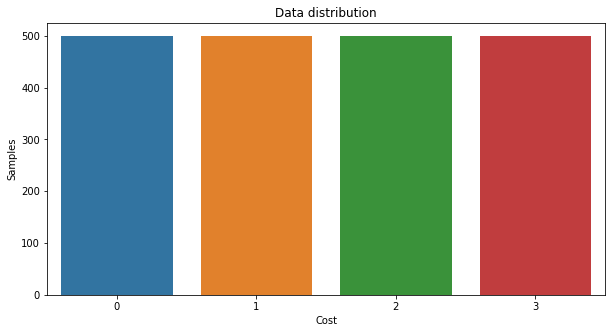

In [14]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='price_range', data = df)
plt.xlabel('Cost')
plt.ylabel('Samples')
plt.title('Data distribution')
plt.show()

## 1.2 Data analysis

### 1.2.1 Countplot - shows the counts of observations in each categorical bin using bars

Below, there are several countplots for variables such as four_g, wifi, n_cores or bluetooth or touchscreen. The x-axis represents the value of the categorical variable, the y-axis the count for the variable with a certain value, while the color denotes the price range of the variable. The main purpose for using countplots is to demonstrate whether the presence or the absence of some phone's feature (for example whether the phone has 4G or not) indicates predominantly more expensive phones (if the feature is present) or cheaper phones (if the feature is not present) or just observing how the samples are distributed by price range for different values of some variable (for example number of cores).

And indeed, in almost all of the countplots (except touchscreen countplot), we observe that mobile phones are distributed as sligthly more expensive when some feature is present.

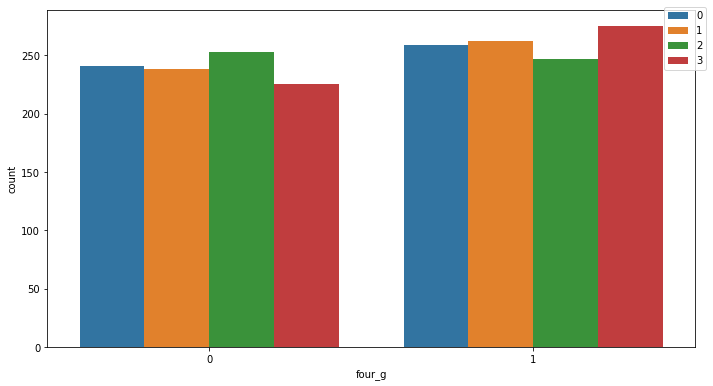

In [15]:
f, ax = plt.subplots(figsize=(9,6))
ax = sns.countplot(x='four_g', hue = 'price_range', data = df)
plt.legend(bbox_to_anchor=(1.025,1.025),loc="upper right")
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.1)
plt.show()

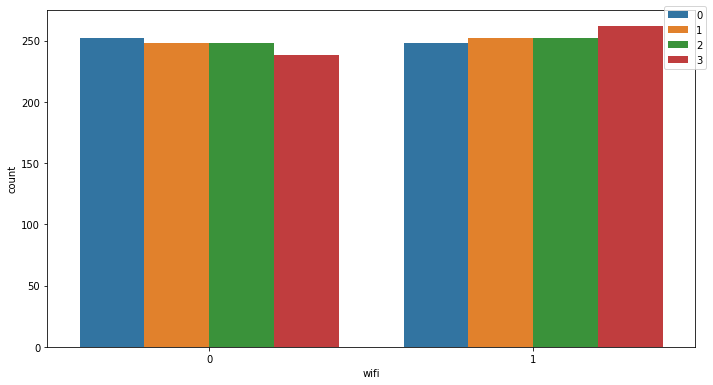

In [16]:
f, ax = plt.subplots(figsize=(9,6))
ax = sns.countplot(x='wifi', hue = 'price_range', data = df)
plt.legend(bbox_to_anchor=(1.025,1.025),loc="upper right")
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.1)
plt.show()

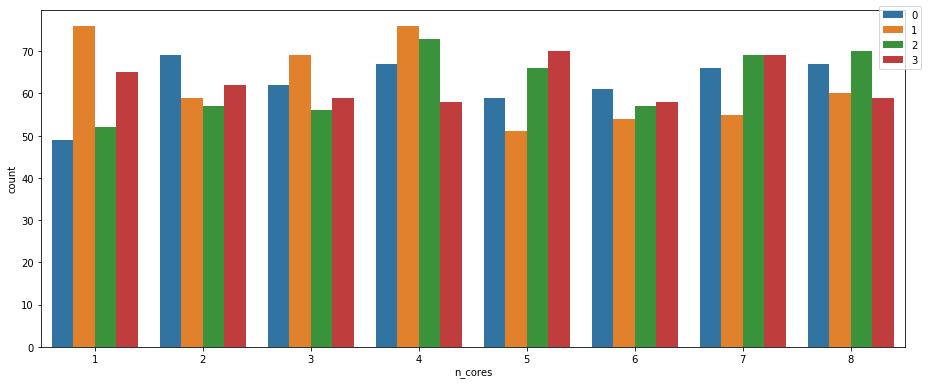

In [17]:
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='n_cores', hue = 'price_range', data = df)
plt.legend(bbox_to_anchor=(1.025,1.025),loc="upper right")
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.1)
plt.show()

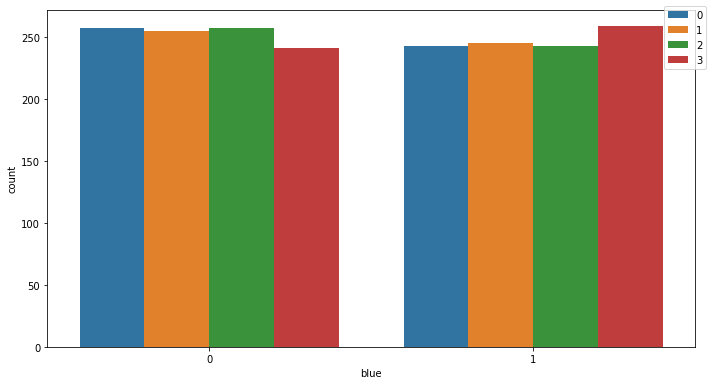

In [18]:
f, ax = plt.subplots(figsize=(9,6))
ax = sns.countplot(x='blue', hue = 'price_range', data = df)
plt.legend(bbox_to_anchor=(1.025,1.025),loc="upper right")
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.1)
plt.show()

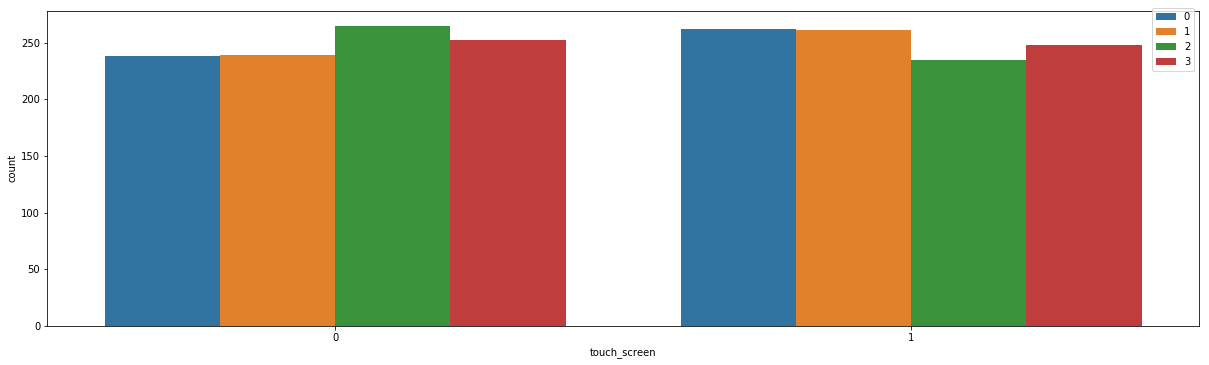

In [19]:
f, ax = plt.subplots(figsize=(16,6))
ax = sns.countplot(x='touch_screen', hue = 'price_range', data = df)
plt.legend(bbox_to_anchor=(1.,1.025),loc="upper right")
plt.subplots_adjust(left=0.1, bottom=0.15, right=1.1)
plt.show()

### 1.2.2 Box plot - shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable

We can observe in some of the below figures (the boxplots for ram and battery power features) that the price range of mobile phone linearly increases when one of these features also increases (an indicator that these features are good predictors).

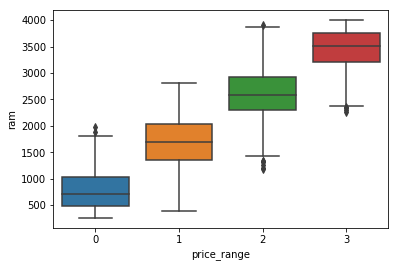

In [28]:
sns.boxplot(x = 'price_range', y = 'ram', data = df)

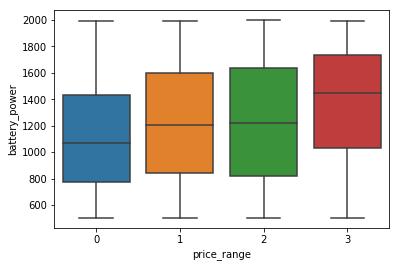

In [29]:
sns.boxplot(x = 'price_range', y = 'battery_power', data = df)

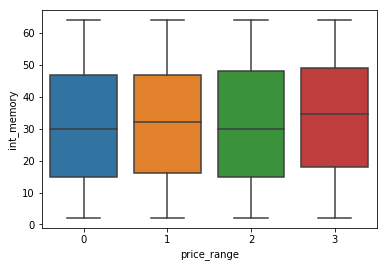

In [30]:
sns.boxplot(x = 'price_range', y = 'int_memory', data = df)

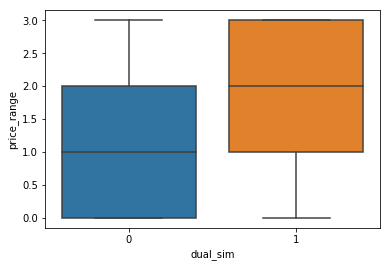

In [31]:
sns.boxplot(x = 'dual_sim', y = 'price_range', data = df)

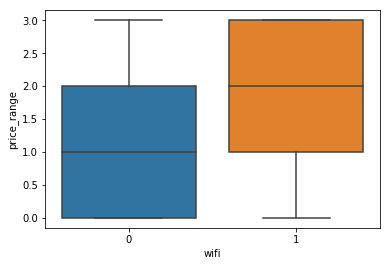

In [32]:
sns.boxplot(x = 'wifi', y = 'price_range', data = df)

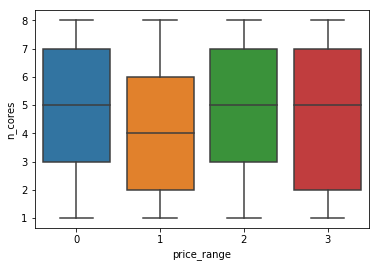

In [33]:
sns.boxplot(x = 'price_range', y = 'n_cores', data = df)

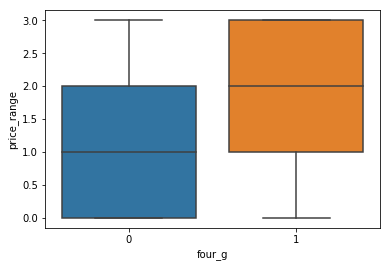

In [34]:
sns.boxplot(x = 'four_g', y = 'price_range', data = df)

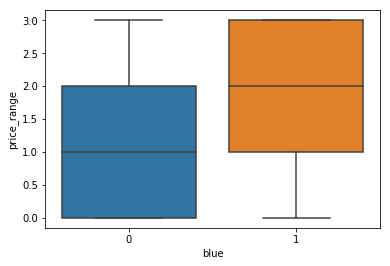

In [35]:
sns.boxplot(x = 'blue', y = 'price_range', data = df)

### 1.2.3 Point plot - a point plot represents an estimate of central tendency (mean) for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.


We can clearly see, for the ram point plot that there's a linear relationship between price and ram feature (we also observed this trend in the boxplot graph)

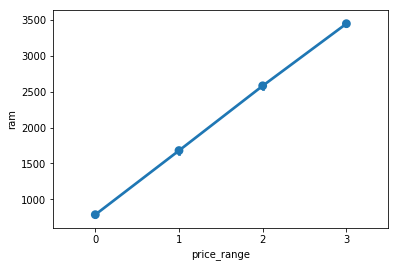

In [36]:
sns.pointplot(df["price_range"], df["ram"])

**We can draw more complex pointplots - for example if we want to see the trend of the price range for mobile phones with wifi and a certain internal memory value**

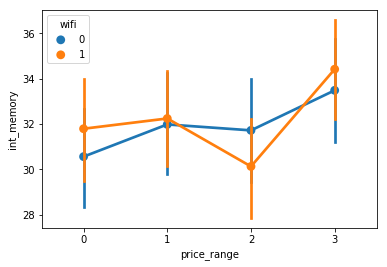

In [37]:
sns.pointplot(df["price_range"], df["int_memory"], hue = df["wifi"])

**The pixel width and height are also a good predictors for the price range**

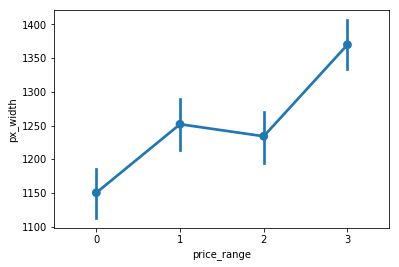

In [38]:
sns.pointplot(df["price_range"], df["px_width"])

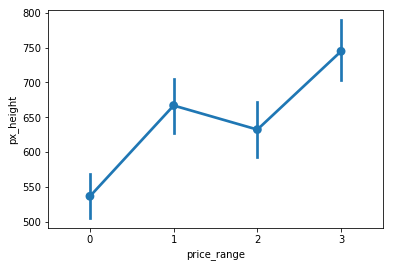

In [39]:
sns.pointplot(df["price_range"], df["px_height"])

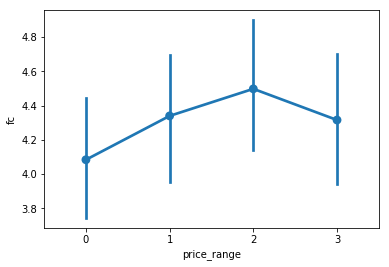

In [40]:
sns.pointplot(df["price_range"], df["fc"])

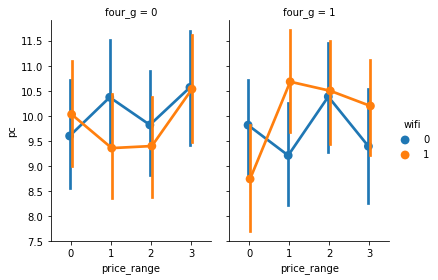

In [41]:
g = sns.catplot(x = "price_range", y="pc",
                 hue="wifi", col="four_g",
                 data=df, kind="point",
                 dodge=True,
                height=4, aspect=.7)

## 1.2.4 Correlation Matrix: 
After computing the correlation matrix we obtained a few pairs of highly correlated features such as (pc, fc), (three_g, four_g), (px_height, px_width) meaning we can drop one feature per pair when fitting the dataset to a model. We also observe a high correlation coefficient between  ram and price range which denotes that ram is a good predictor for classifying the price range.

In [50]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.0,0.011,0.011,-0.042,0.033,0.016,-0.004,0.034,0.0018,-0.03,0.031,0.015,-0.0084,-0.00065,-0.03,-0.021,0.053,0.012,-0.011,-0.0083,0.2
blue,0.011,1.0,0.021,0.035,0.0036,0.013,0.041,0.004,-0.0086,0.036,-0.01,-0.0069,-0.042,0.026,-0.003,0.00061,0.014,-0.03,0.01,-0.022,0.021
clock_speed,0.011,0.021,1.0,-0.0013,-0.00043,-0.043,0.0065,-0.014,0.012,-0.0057,-0.0052,-0.015,-0.0095,0.0034,-0.029,-0.0074,-0.011,-0.046,0.02,-0.024,-0.0066
dual_sim,-0.042,0.035,-0.0013,1.0,-0.029,0.0032,-0.016,-0.022,-0.009,-0.025,-0.017,-0.021,0.014,0.041,-0.012,-0.017,-0.039,-0.014,-0.017,0.023,0.017
fc,0.033,0.0036,-0.00043,-0.029,1.0,-0.017,-0.029,-0.0018,0.024,-0.013,0.64,-0.01,-0.0052,0.015,-0.011,-0.012,-0.0068,0.0018,-0.015,0.02,0.022
four_g,0.016,0.013,-0.043,0.0032,-0.017,1.0,0.0087,-0.0018,-0.017,-0.03,-0.0056,-0.019,0.0074,0.0073,0.027,0.037,-0.047,0.58,0.017,-0.018,0.015
int_memory,-0.004,0.041,0.0065,-0.016,-0.029,0.0087,1.0,0.0069,-0.034,-0.028,-0.033,0.01,-0.0083,0.033,0.038,0.012,-0.0028,-0.0094,-0.027,0.007,0.044
m_dep,0.034,0.004,-0.014,-0.022,-0.0018,-0.0018,0.0069,1.0,0.022,-0.0035,0.026,0.025,0.024,-0.0094,-0.025,-0.018,0.017,-0.012,-0.0026,-0.028,0.00085
mobile_wt,0.0018,-0.0086,0.012,-0.009,0.024,-0.017,-0.034,0.022,1.0,-0.019,0.019,0.00094,9e-05,-0.0026,-0.034,-0.021,0.0062,0.0016,-0.014,-0.00041,-0.03
n_cores,-0.03,0.036,-0.0057,-0.025,-0.013,-0.03,-0.028,-0.0035,-0.019,1.0,-0.0012,-0.0069,0.024,0.0049,-0.00031,0.026,0.013,-0.015,0.024,-0.01,0.0044


# 2. Choosing the best model
The best way to choose the hyper parameters that maximize the model’s score is to use a **grid search**, but it is sometimes useful to plot the influence of a single hyper parameter on training or test data to determine if the model is underfitting or overfitting under the influence of that hyper parameter’s values. 
In order to determine that influence, we are going to use a **validation curve**. The validation curve explores the relation between a range of values for a given hyper parameter and the model’s score combined with k split cross validation. Before fitting the data to a model, we split it into a training and a testing set keeping 80% of the original data into training and the rest for testing. We also standardize the data to have mean 0 and variance 1

In [10]:
x = df.drop('price_range', axis = 1).drop('three_g', axis = 1).drop('pc', axis = 1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 2.1 Random Forests

Random forests is a learning method used for classification and/or regression that operates by building multiple decision trees at training time and outputs the majority class (classification) or mean prediction (regression) of each individual tree. This method uses two key concepts:

    
**1. Random sampling of training examples when building trees**



    
**2. Random subsets of features considered when building nodes**

There are a few important hyper parameters that need to be tuned in order to obtain good results: number of estimators (the number of trees in the forest), the maximum depth of the tree, the minimum number of samples required to split a node, the number of features to consider when building nodes, the minimum samples required to be a leaf node or the criterion (gini impurity or information gain). In the below figures we can observe the validation curves for the number of estimators, the maximum depth, the minimum samples split and the minimum samples required to be a leaf node with a 10 split cross validation for each parameter

### 2.1.1 Validation curve for max_depth parameter

Mean Train scores:  [0.86763921 0.98833265 0.99576374 0.99645852]
Mean Validation scores:  [0.77005751 0.81443585 0.81817421 0.8119277 ]


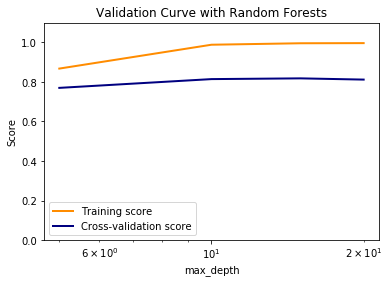

In [12]:

max_depth = (5,10,15,20)


rfc = RandomForestClassifier(random_state = 0, bootstrap = True)

train_scores, test_scores = validation_curve(
    rfc, x_train, y_train, param_name="max_depth", param_range=max_depth,cv = 10,
    scoring="accuracy", n_jobs=2)

train_scores_mean = np.mean(train_scores, axis=1)
print('Mean Train scores: ',train_scores_mean)
test_scores_mean = np.mean(test_scores, axis=1)
print('Mean Validation scores: ',test_scores_mean)

plt.title("Validation Curve with Random Forests")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

lw = 2

plt.semilogx(max_depth, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(max_depth, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()


### 2.1.2 Validation curve for n_estimators parameter

Train scores:  [0.99625019 0.99972227 1.         1.        ]
Validation scores:  [0.81007585 0.84766771 0.84945376 0.85759871]


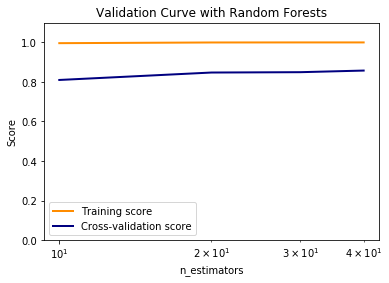

In [13]:
n_estimators = (10,20,30,40)
train_scores, test_scores = validation_curve(
    rfc, x_train, y_train, param_name="n_estimators", param_range=n_estimators,cv = 10,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
print('Train scores: ',train_scores_mean)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
print('Validation scores: ',test_scores_mean)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forests")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(n_estimators, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(n_estimators, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

### 2.1.3 Validation curve for min_samples_split parameter

Train scores:  [0.99625019 0.9907646  0.9763188  0.96437555]
Validation scores:  [0.81007585 0.82562864 0.83891349 0.81883065]


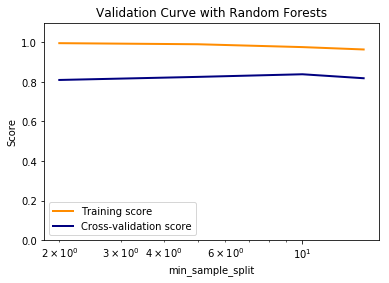

In [14]:
min_samples_split = (2,5,10,15)
train_scores, test_scores = validation_curve(
    rfc, x_train, y_train, param_name="min_samples_split", param_range=min_samples_split,
    cv = 10,scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
print('Train scores: ',train_scores_mean)
test_scores_mean = np.mean(test_scores, axis=1)
print('Validation scores: ',test_scores_mean)

plt.title("Validation Curve with Random Forests")
plt.xlabel("min_sample_split")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(min_samples_split, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.semilogx(min_samples_split, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

### 2.1.4 Validation curve for min_samples_leaf parameter

Train scores:  [0.99625019 0.99013874 0.96152533 0.92277515]
Validation scores:  [0.81007585 0.83314786 0.83706907 0.81193585]


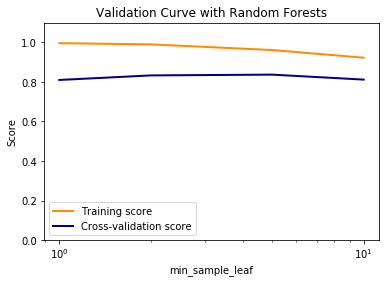

In [15]:
min_samples_leaf = (1,2,5,10)
train_scores, test_scores = validation_curve(
    rfc, x_train, y_train, param_name="min_samples_leaf", param_range=min_samples_leaf,
    cv = 10,scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
print('Train scores: ',train_scores_mean)
test_scores_mean = np.mean(test_scores, axis=1)
print('Validation scores: ',test_scores_mean)

plt.title("Validation Curve with Random Forests")
plt.xlabel("min_sample_leaf")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(min_samples_leaf, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.semilogx(min_samples_leaf, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

**Retraining a model for n_estimators = 40, max_depth = 10, min_samples_split = 2 and min_samples_leaf = 2 gave us an accuracy of 0.996% accuracy on training set and 0.86% on the test set which means we are overfitting.
Using the attribute feature_importances_ of the fitted model we did a ranking of each feature’s importance represented with a score. This is illustrated in the below figure and we can observe that feature number 12 which corresponds to the ram column is predominantly more important than the others.**


 [[99  1  0  0]
 [ 6 79 12  0]
 [ 0 15 76 15]
 [ 0  0  7 90]] 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       100
           1       0.83      0.81      0.82        97
           2       0.80      0.72      0.76       106
           3       0.86      0.93      0.89        97

   micro avg       0.86      0.86      0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

Training set score for Random Forest: 0.996875
Testing  set score for Random Forest: 0.860000


Feature ranking:
1. feature ram (0.590689)
2. feature battery_power (0.076483)
3. feature px_height (0.053725)
4. feature px_width (0.053550)
5. feature int_memory (0.030254)
6. feature mobile_wt (0.028710)
7. feature talk_time (0.023672)
8. feature clock_speed (0.022797)
9. feature sc_w (0.022689)
10. feature sc_h (0.020765)
11. feature m_dep (0.018862)
12. feature n_cores (0.017050)
13. feature fc (

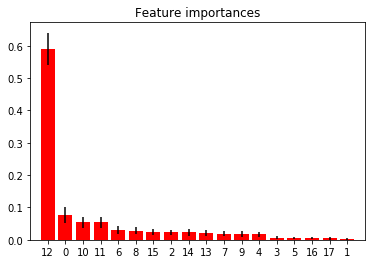

In [16]:
rf_clf_best = RandomForestClassifier(n_estimators = 40, max_depth = 10, min_samples_split = 2, min_samples_leaf = 2,
                                     bootstrap = True,random_state=0)
rf_clf_best.fit(x_train, y_train)
y_pred_rf = rf_clf_best.predict(x_test)

print('\n',confusion_matrix(y_test, y_pred_rf), '\n')
print(classification_report(y_test, y_pred_rf))
print("Training set score for Random Forest: %f" % rf_clf_best.score(x_train , y_train))
print("Testing  set score for Random Forest: %f" % rf_clf_best.score(x_test, y_test ))

importances = rf_clf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf_best.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("\n\nFeature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, x.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

**Fitting the same model, but dropping from the dataset the last 5 features with the lowest score in importance, we obtain 0.993% accuracy on training set and 0.87% on the test set, however we got a worse precision and f1-score. (only 0.29)**

In [17]:
x_reduced = x.drop('touch_screen', axis = 1).drop('four_g', axis = 1).drop('wifi', axis = 1).drop('blue', axis = 1).drop('dual_sim', axis = 1)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size = 0.2)

rf_clf_best = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_split = 2, min_samples_leaf = 2,
                                     random_state=0)
rf_clf_best.fit(x_train_reduced, y_train_reduced)
y_pred_rf = rf_clf_best.predict(x_test_reduced)

print(classification_report(y_test, y_pred_rf))
print("Training set score for Random Forest: %f" % rf_clf_best.score(x_train_reduced , y_train_reduced))
print("Testing  set score for Random Forest: %f" % rf_clf_best.score(x_test_reduced, y_test_reduced ))

              precision    recall  f1-score   support

           0       0.32      0.33      0.33       100
           1       0.23      0.23      0.23        97
           2       0.31      0.27      0.29       106
           3       0.30      0.33      0.31        97

   micro avg       0.29      0.29      0.29       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.29      0.29      0.29       400

Training set score for Random Forest: 0.993750
Testing  set score for Random Forest: 0.870000


**Below it's a heatmap plot of the obtained confusion matrix**

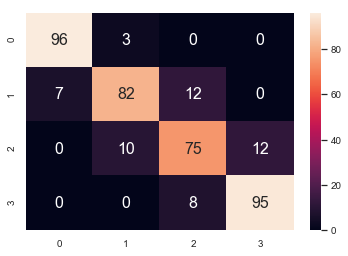

In [18]:
cm = confusion_matrix(y_test_reduced, y_pred_rf)
df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))

sns.set(font_scale=.9)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt = "d")

plt.show()

**I also tried a grid search over the param_grid dictionary containing a range of values for each parameter combined with a 10 split cross validation obtaining 0.88% accuracy (which is still overfitting) on a model fitted with the hyper parameters which got the best mean test accuracy.**

In [19]:
param_grid = { 
    'n_estimators': [10,20,30,40],
    'max_depth' : [5,10,15,20],
    'min_samples_split' : [2, 5, 10, 15],
    'min_samples_leaf' : [1, 2, 5, 10]
}

rf_grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10)
rf_grid_search.fit(x_train_reduced, y_train_reduced)

rf_grid_search.best_params_


{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

In [20]:
max(pd.DataFrame(rf_grid_search.cv_results_)['mean_test_score'])

0.8775

In [21]:
rf_clf_best_gd = RandomForestClassifier(n_estimators = 40, max_depth = 15, min_samples_split = 2, min_samples_leaf = 2,
                                     bootstrap = True, random_state=0)
rf_clf_best_gd.fit(x_train_reduced, y_train_reduced)
y_pred_rf_gd = rf_clf_best_gd.predict(x_test_reduced)

print(classification_report(y_test, y_pred_rf_gd))
print("Training set score for Random Forest: %f" % rf_clf_best_gd.score(x_train_reduced , y_train_reduced))
print("Testing  set score for Random Forest: %f" % rf_clf_best_gd.score(x_test_reduced, y_test_reduced ))

              precision    recall  f1-score   support

           0       0.32      0.33      0.33       100
           1       0.21      0.21      0.21        97
           2       0.30      0.27      0.29       106
           3       0.30      0.33      0.31        97

   micro avg       0.28      0.28      0.28       400
   macro avg       0.28      0.28      0.28       400
weighted avg       0.28      0.28      0.28       400

Training set score for Random Forest: 0.998750
Testing  set score for Random Forest: 0.880000


**Heatmap plot of the confusion matrix of RF's gridsearch model**

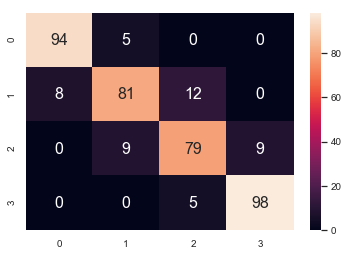

In [22]:
cm = confusion_matrix(y_test_reduced, y_pred_rf_gd)
df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))

sns.set(font_scale=.9)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt = "d")

plt.show()

# 2.2 Support Vector Machines

SVMs or Support Vector Machines is a linear model which can be used in regression and/or classification tasks. It can also be used for solving non-linear problems by applying kernel functions. For example, if we consider a binary classification problem, what SVMs does is it tries to find a hyperplane that correctly separates the two classes. 
SVMs have a few important parameters that need to be tuned in order to obtain good results: <b>C</b> , acts like a regularization parameter and controls the trade-off between bias and variance. A large value of C means a high bias and low variance, whereas a small value of C means a low bias and high variance. 
The **kernel function** which can be a linear, polynomial or Gaussian kernel and **gamma** which is a parameter of the Gaussian kernel. 

### 2.2.1 Validation curve for C parameter

Train scores:  [0.96000059 0.97694399 0.98638835 0.99229176]
Test scores:  [0.94317144 0.9538011  0.96942727 0.97190412]


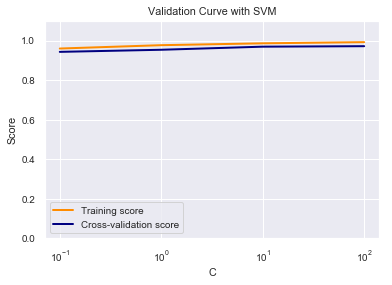

In [28]:
C = (.1,  1,10, 100)

train_scores, test_scores = validation_curve(
    svm.SVC(kernel='linear'), x_train, y_train, param_name="C", param_range=C, cv = 10,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
print('Train scores: ',train_scores_mean)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
print('Test scores: ',test_scores_mean)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(C, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(C, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

### 2.2.2 Validation curve for gamma parameter


Train scores:  [0.49763869 0.75271106 0.94611135 0.99819411]
Test scores:  [0.49749985 0.71118332 0.91067697 0.83007731]


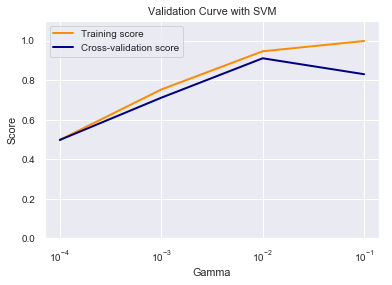

In [29]:
gamma = (.0001,.001,.01, 0.1)
train_scores, test_scores = validation_curve(
    svm.SVC(kernel='rbf'), x_train, y_train, param_name="gamma", param_range=gamma, cv = 10,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
print('Train scores: ',train_scores_mean)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
print('Test scores: ',test_scores_mean)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("Gamma")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(gamma, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(gamma, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

### 2.2.3 Validation curve for kernel parameter


Train scores:  [0.97694399 0.98493006 0.96583369 0.86986056]
Test scores:  [0.9538011  0.87263481 0.76938563 0.91881406]


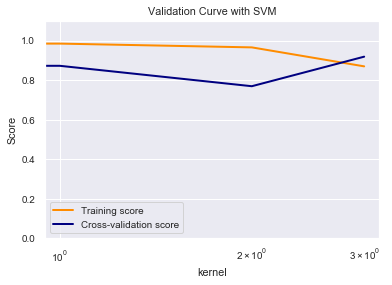

In [30]:
kernel = ('linear', 'rbf', 'poly', 'sigmoid')
train_scores, test_scores = validation_curve(
    svm.SVC(), x_train, y_train, param_name="kernel", param_range=kernel, cv = 10,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
print('Train scores: ',train_scores_mean)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
print('Test scores: ',test_scores_mean)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("kernel")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(kernel, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(kernel, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

**I retrained the model with the hyper parameters which obtained the best mean test accuracy. Retraining the model for C = 100, Gamma = 0.01 and kernel = 'linear' gave us an accuracy of 0.987% on training set and 0.977% on test set, which is the best result so far.**

In [8]:
best_model_svm = svm.SVC(kernel='linear', C = 100, gamma = 0.01)
best_model_svm.fit(x_train, y_train)
y_pred_svm = best_model_svm.predict(x_test)

print('\n',confusion_matrix(y_test, y_pred_svm), '\n')
print(classification_report(y_test, y_pred_svm))
print("Training set score for SVM: %f" % best_model_svm.score(x_train , y_train))
print("Testing  set score for SVM: %f" % best_model_svm.score(x_test, y_test ))


 [[ 93   1   0   0]
 [  2 101   3   0]
 [  0   2  91   1]
 [  0   0   0 106]] 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.97      0.95      0.96       106
           2       0.97      0.97      0.97        94
           3       0.99      1.00      1.00       106

   micro avg       0.98      0.98      0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Training set score for SVM: 0.987500
Testing  set score for SVM: 0.977500


**Below there's a heatmap plot of the confusion matrix of the above model**

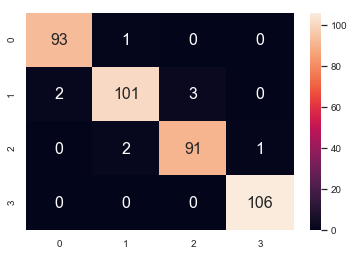

In [19]:

cm = confusion_matrix(y_test, y_pred_svm)
df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))

sns.set(font_scale=.9)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt = "d")

plt.show()

**I then tried a grid search over the param_grid dictionary containing the hyper parameters and their values to see if we can get a better result. I obtained: C = 100, Gamma = 0.00001, kernel = 'linear' and a test accuracy of 0.977%.**

In [10]:
param_grid = { 
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'C' : [.1,1,10,100],
    'gamma' : np.logspace(-6,-1,5)
}
svm_clf_best = svm.SVC()
svm_grid_search = GridSearchCV(estimator = svm_clf_best, param_grid = param_grid, cv = 10)
svm_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': array([1.00000e-06, 1.77828e-05, 3.16228e-04, 5.62341e-03, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
svm_grid_search.best_params_

{'C': 100, 'gamma': 1e-06, 'kernel': 'linear'}

In [13]:
max(pd.DataFrame(svm_grid_search.cv_results_)['mean_test_score'])

0.969375

In [14]:
best_model_svm_gd = svm.SVC(kernel='linear', C = 100, gamma = 1e-06)
best_model_svm_gd.fit(x_train, y_train)
y_pred_svm_gd = best_model_svm_gd.predict(x_test)

print('\n',confusion_matrix(y_test, y_pred_svm_gd), '\n')
print(classification_report(y_test, y_pred_svm_gd))
print("Training set score for SVM: %f" % best_model_svm_gd.score(x_train , y_train))
print("Testing  set score for SVM: %f" % best_model_svm_gd.score(x_test, y_test ))


 [[ 93   1   0   0]
 [  2 101   3   0]
 [  0   2  91   1]
 [  0   0   0 106]] 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.97      0.95      0.96       106
           2       0.97      0.97      0.97        94
           3       0.99      1.00      1.00       106

   micro avg       0.98      0.98      0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Training set score for SVM: 0.987500
Testing  set score for SVM: 0.977500


**Heatmap plot of the confusion matrix of SVM's gridsearch model**

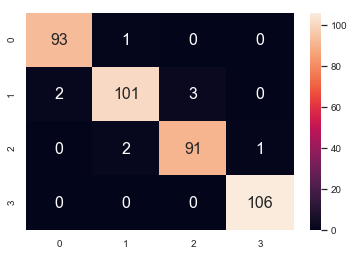

In [15]:

cm = confusion_matrix(y_test, y_pred_svm_gd)
df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))

sns.set(font_scale=.9)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt = "d")

plt.show()

# 3. Conclusion

We  can observe in the below table that SVMs with a linear kernel outperforms Random Forests in terms of test accuracy, precision and F1-score. This is an indicator that our data is linearly separable and this is true since SVM with a linear kernel obtains better results than other kernel functions. SVMs are also better suited for small datasets, whereas tree based methods tend to overfit when we have a small number of examples.  


<table width="500" height="1000">
    <tr>
        <th><b>Model</b></th>
        <th><b>Test accuracy</b></th>
        <th><b>Precision</b></th>
        <th><b>F1-score</b></th>
    </tr>
    <tr>
        <td>Random Forests</td>
        <td>0.88</td>
        <td>0.28</td>
        <td>0.28</td>
    </tr>
    <tr>
        <td>SVMs</td>
        <td>0.977</td>
        <td>0.98</td>
        <td>0.98</td>
    </tr>
</table>